In [1]:
import os

# List of language codes
languages = ["ar", "en", "es", "fr", "ids", "ru", "zh"]

print("Dataset lengths and example lines:")
for lang in languages:
    filepath = f'test_datasets/testsets/testset/UNv1.0.testset.{lang}'
    with open(filepath, 'r') as f:
        lines = f.read().splitlines()
        print(f"\n{lang}: {len(lines)} lines")
        print("First 3 lines:")
        for line in lines[:3]:
            print(f"  {line[:100]}...")


Dataset lengths and example lines:

ar: 4000 lines
First 3 lines:
  الجلسة 7439 المعقودة في 11 أيار/مايو ٢٠١٥....
  وقد نشر التنظيم نفسه أشرطة فيديو تبيّن تعرض أشخاص إلى عقوبات فظيعة من بينها الرجم والرمي عن أسطح الم...
  وصرفت منظمة اليونيسيف مساعدة نقدية طارئة لعشرات آلاف الأسر المشردة في المخيمات وصرفت مفوضية الأمم ال...

en: 4000 lines
First 3 lines:
  7439th meeting, held on 11 May 2015....
  ISIL itself has published videos depicting people being subjected to a range of abhorrent punishment...
  UNICEF disbursed emergency cash assistance to tens of thousands of displaced families in camps and U...

es: 4000 lines
First 3 lines:
  7439ª sesión, celebrada el 11 de mayo de 2015....
  El propio EIIL ha publicado vídeos en los que se muestran imágenes de personas sometidas a una serie...
  El UNICEF pagó ayudas monetarias de urgencia para asistir a decenas de miles de familias desplazadas...

fr: 4000 lines
First 3 lines:
  7439e séance, tenue le 11 mai 2015...
  L'EIIL a mis en ligne

In [15]:
def dataset_details(dataset):
    """
    Analyze a HuggingFace dataset and print basic statistics.
    
    Args:
        dataset: A HuggingFace dataset object to analyze
    """
    # Print basic dataset info
    print(f"\nDataset Info:")
    print(f"Number of examples: {len(dataset)}")
    print(f"\nDataset features: {dataset.features}")

    # Display first few examples
    print("\nFirst 3 examples:")
    for i in range(min(3, len(dataset))):
        example = dataset[i]
        print(f"\nExample {i+1}:")
        print("Text:")
        for idx, text in enumerate(example['text']):
            print(f"  Caption {idx}: {text}")
        # Show image preview info instead of full image
        img = example['image']
        print(f"Image shape: {img.size}")  # PIL image size
        print(f"Image preview: {img.size[0]}x{img.size[1]} pixels, {img.mode} mode")
        print("All fields in example:")
        for key, value in example.items():
            if key != 'image' and key != 'text':  # Already printed these
                print(f"  {key}: {value}")

    # Basic statistics about text lengths
    text_lengths = [len(str(x['text'][0])) for x in dataset]
    print(f"\nText length statistics:")
    print(f"Mean length: {sum(text_lengths)/len(text_lengths):.1f} characters")
    print(f"Min length: {min(text_lengths)} characters")
    print(f"Max length: {max(text_lengths)} characters")
    
    return dataset

In [5]:
import torch
from utils import create_compatible_dataset, load_single_language_data
# Get Chinese lines

dataset = load_single_language_data('zh')

Saving the dataset (0/1 shards):   0%|          | 0/4000 [00:00<?, ? examples/s]

In [8]:
dataset_details(dataset)


Dataset Info:
Number of examples: 4000

Dataset features: {'text': Sequence(feature=Value(dtype='string', id=None), length=-1, id=None), 'image': Image(mode=None, decode=True, id=None)}

First 3 examples:

Example 1:
Text:
  Caption 0: 第7439次会议，2015年5月11日举行。
Image shape: (224, 224)
All fields in example:

Example 2:
Text:
  Caption 0: 伊黎伊斯兰国自己发布视频，描述人们受到一系列令人发指的惩罚，包括投掷石块、从楼上推下去、斩首、用十字架钉死。
Image shape: (224, 224)
All fields in example:

Example 3:
Text:
  Caption 0: 儿童基金会为难民营中成千上万个流离失所家庭发放了紧急现金援助，难民署则为弱势境内流离失所家庭分发了现金援助。
Image shape: (224, 224)
All fields in example:



Text length statistics:
Mean length: 47.1 characters
Min length: 2 characters
Max length: 345 characters


Dataset({
    features: ['text', 'image'],
    num_rows: 4000
})

In [16]:
from datasets import load_dataset
prh = load_dataset('minhuh/prh', revision='v1.0.0', split='train')

dataset_details(prh)

Using the latest cached version of the dataset since minhuh/prh couldn't be found on the Hugging Face Hub
Found the latest cached dataset configuration 'default' at /root/.cache/huggingface/datasets/minhuh___prh/default/0.0.0/0220f2b7b28bacc1f7034f358e46e39bd9078a03 (last modified on Mon Jan 27 01:11:08 2025).



Dataset Info:
Number of examples: 1024

Dataset features: {'image': Image(mode=None, decode=True, id=None), 'text': Sequence(feature=Value(dtype='string', id=None), length=-1, id=None), 'origin': Value(dtype='string', id=None)}

First 3 examples:

Example 1:
Text:
  Caption 0: Figure 2 of Paper. Pseudorhabdosynochus sulamericanus from Hyporthodus haifensis. (A) composite, ventral view; tegumental scales not drawn. (B, C) male quadriloculate organ. (D) sclerotised vagina. (A, C) carmine; (B, D) Berlese.
Image shape: (3733, 4539)
Image preview: 3733x4539 pixels, RGB mode
All fields in example:
  origin: n/a

Example 2:
Text:
  Caption 0: Poolbeg generating station after being closed down
Image shape: (6000, 4000)
Image preview: 6000x4000 pixels, RGB mode
All fields in example:
  origin: n/a

Example 3:
Text:
  Caption 0: Grundig Satellit400 solid-state, digital shortwave receiver, c.1986[1]
Image shape: (3072, 2304)
Image preview: 3072x2304 pixels, RGB mode
All fields in example:
  orig

Dataset({
    features: ['image', 'text', 'origin'],
    num_rows: 1024
})

Analyzing Alignments

In [ ]:
print('hi')

In [2]:
import pickle

with open('results/alignment/en_zh/val/model_paths_mapping.pkl', 'rb') as f:
    model_paths = pickle.load(f)
print("\nModel paths mapping:")
for key, value in model_paths.items():
    print(f"\n{key}:")
    for path in value:
        print(f"  {path}")


Model paths mapping:

x_paths:
  ./results/features/en/wit_1024/bigscience_bloomz-560m_pool-avg.pt
  ./results/features/en/wit_1024/bigscience_bloomz-1b1_pool-avg.pt
  ./results/features/en/wit_1024/bigscience_bloomz-1b7_pool-avg.pt
  ./results/features/en/wit_1024/bigscience_bloomz-3b_pool-avg.pt
  ./results/features/en/wit_1024/bigscience_bloomz-7b1_pool-avg.pt
  ./results/features/en/wit_1024/openlm-research_open_llama_3b_pool-avg.pt
  ./results/features/en/wit_1024/openlm-research_open_llama_7b_pool-avg.pt
  ./results/features/en/wit_1024/openlm-research_open_llama_13b_pool-avg.pt
  ./results/features/en/wit_1024/huggyllama_llama-7b_pool-avg.pt
  ./results/features/en/wit_1024/huggyllama_llama-13b_pool-avg.pt
  ./results/features/en/wit_1024/huggyllama_llama-30b_pool-avg.pt
  ./results/features/en/wit_1024/huggyllama_llama-65b_pool-avg.pt

y_paths:
  ./results/features/zh/wit_1024/bigscience_bloomz-560m_pool-avg.pt
  ./results/features/zh/wit_1024/bigscience_bloomz-1b1_pool-avg.pt

In [12]:
def parse_model_name(path):
    """Parse model name from feature file path.
    
    Example:
        Input: ./results/features/en/wit_1024/bigscience_bloomz-560m_pool-avg.pt
        Output: bloomz-560m
    """
    # Get filename without extension
    filename = path.split('/')[-1].replace('.pt', '')
    
    # Split on underscores and get model name component
    parts = filename.split('_')
    
    # Handle bigscience prefix if present
    if parts[0] == 'bigscience':
        return parts[1]
    else:
        return parts[0]

# Get model names from paths
x_path_names = [parse_model_name(path) for path in model_paths['x_paths']]
y_path_names = [parse_model_name(path) for path in model_paths['y_paths']]

# Test the function
test_path = "./results/features/en/wit_1024/bigscience_bloomz-560m_pool-avg.pt"
print(f"Original path: {test_path}")
print(f"Parsed model name: {parse_model_name(test_path)}")


Original path: ./results/features/en/wit_1024/bigscience_bloomz-560m_pool-avg.pt
Parsed model name: bloomz-560m


In [13]:
!pip install matplotlib
!pip install seaborn


Loading alignment for models 0, 0:
Shape: (25, 25)


/tmp/ipykernel_550/1719720581.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  alignment = torch.load(alignment_path)


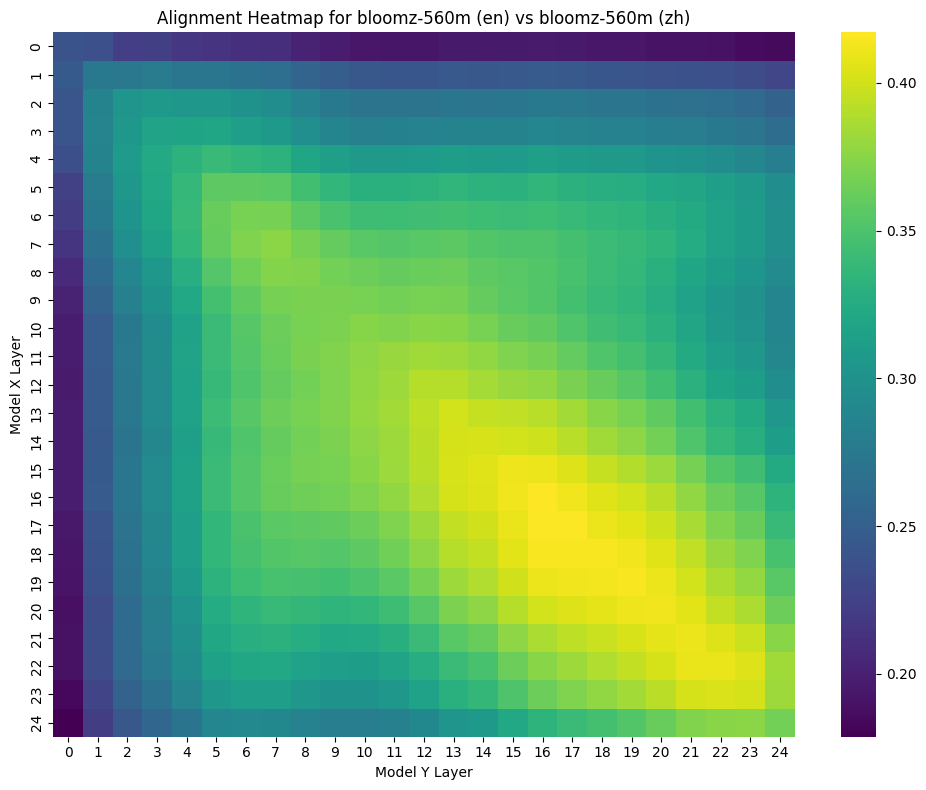


Loading alignment for models 0, 1:
Shape: (25, 25)

Loading alignment for models 0, 2:
Shape: (25, 25)

Loading alignment for models 0, 3:
Shape: (31, 25)

Loading alignment for models 0, 4:
Shape: (31, 25)

Loading alignment for models 0, 5:
Shape: (27, 25)

Loading alignment for models 0, 6:
Shape: (33, 25)

Loading alignment for models 0, 7:
Shape: (41, 25)

Loading alignment for models 0, 8:
Shape: (33, 25)

Loading alignment for models 1, 0:
Shape: (25, 25)

Loading alignment for models 1, 1:
Shape: (25, 25)


/tmp/ipykernel_550/1719720581.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  alignment = torch.load(alignment_path)


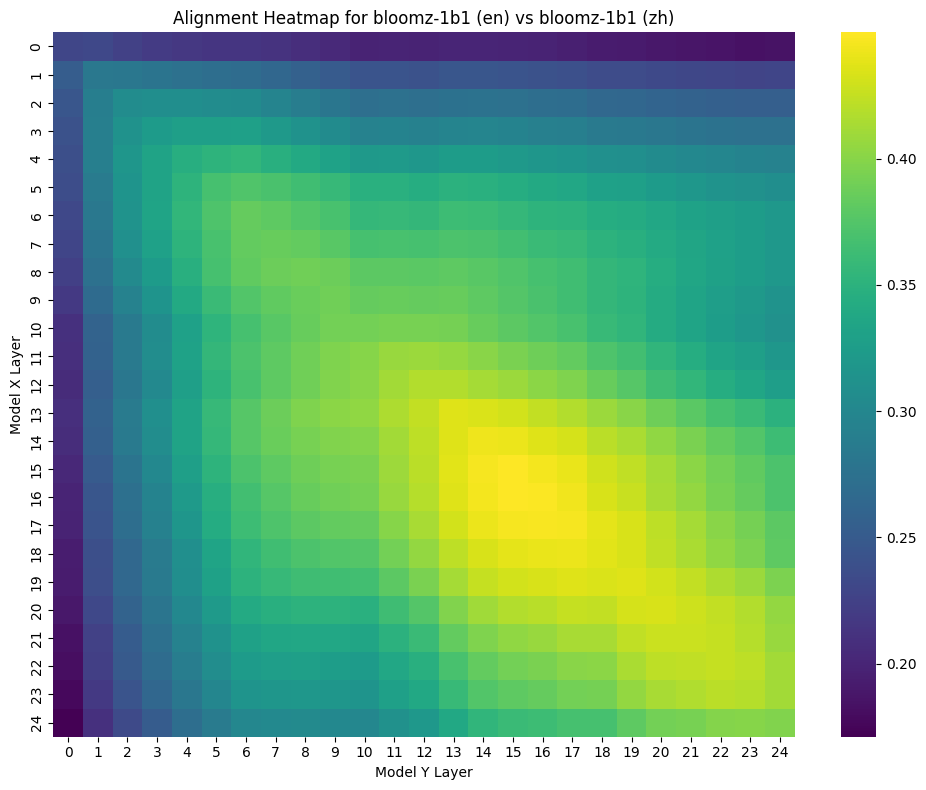


Loading alignment for models 1, 2:
Shape: (25, 25)

Loading alignment for models 1, 3:
Shape: (31, 25)

Loading alignment for models 1, 4:
Shape: (31, 25)

Loading alignment for models 1, 5:
Shape: (27, 25)

Loading alignment for models 1, 6:
Shape: (33, 25)

Loading alignment for models 1, 7:
Shape: (41, 25)

Loading alignment for models 1, 8:
Shape: (33, 25)

Loading alignment for models 2, 0:
Shape: (25, 25)

Loading alignment for models 2, 1:
Shape: (25, 25)

Loading alignment for models 2, 2:
Shape: (25, 25)


/tmp/ipykernel_550/1719720581.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  alignment = torch.load(alignment_path)


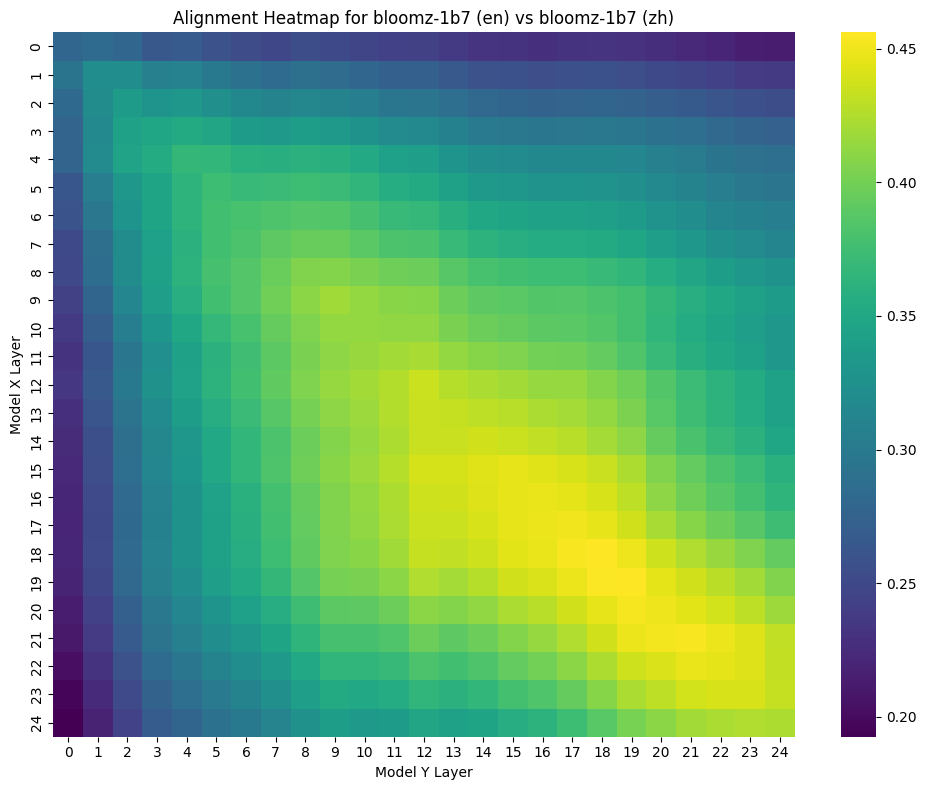


Loading alignment for models 2, 3:
Shape: (31, 25)

Loading alignment for models 2, 4:
Shape: (31, 25)

Loading alignment for models 2, 5:
Shape: (27, 25)

Loading alignment for models 2, 6:
Shape: (33, 25)

Loading alignment for models 2, 7:
Shape: (41, 25)

Loading alignment for models 2, 8:
Shape: (33, 25)

Loading alignment for models 3, 0:
Shape: (25, 31)

Loading alignment for models 3, 1:
Shape: (25, 31)

Loading alignment for models 3, 2:
Shape: (25, 31)

Loading alignment for models 3, 3:
Shape: (31, 31)


/tmp/ipykernel_550/1719720581.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  alignment = torch.load(alignment_path)


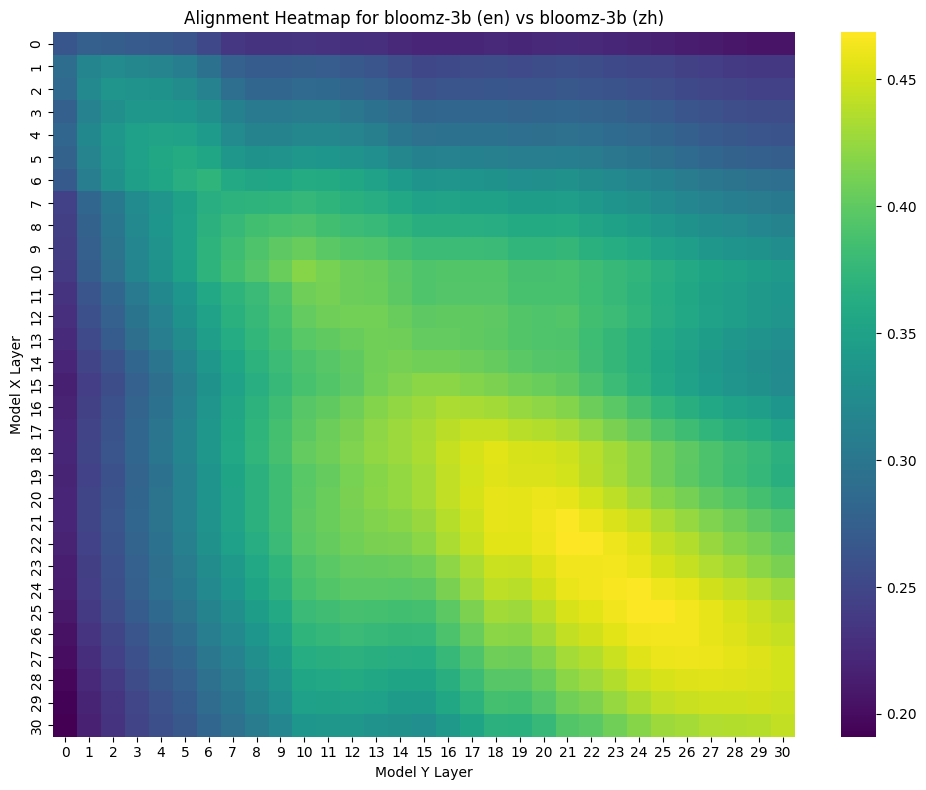


Loading alignment for models 3, 4:
Shape: (31, 31)

Loading alignment for models 3, 5:
Shape: (27, 31)

Loading alignment for models 3, 6:
Shape: (33, 31)

Loading alignment for models 3, 7:
Shape: (41, 31)

Loading alignment for models 3, 8:
Shape: (33, 31)

Loading alignment for models 4, 0:
Shape: (25, 31)

Loading alignment for models 4, 1:
Shape: (25, 31)

Loading alignment for models 4, 2:
Shape: (25, 31)

Loading alignment for models 4, 3:
Shape: (31, 31)

Loading alignment for models 4, 4:
Shape: (31, 31)


/tmp/ipykernel_550/1719720581.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  alignment = torch.load(alignment_path)


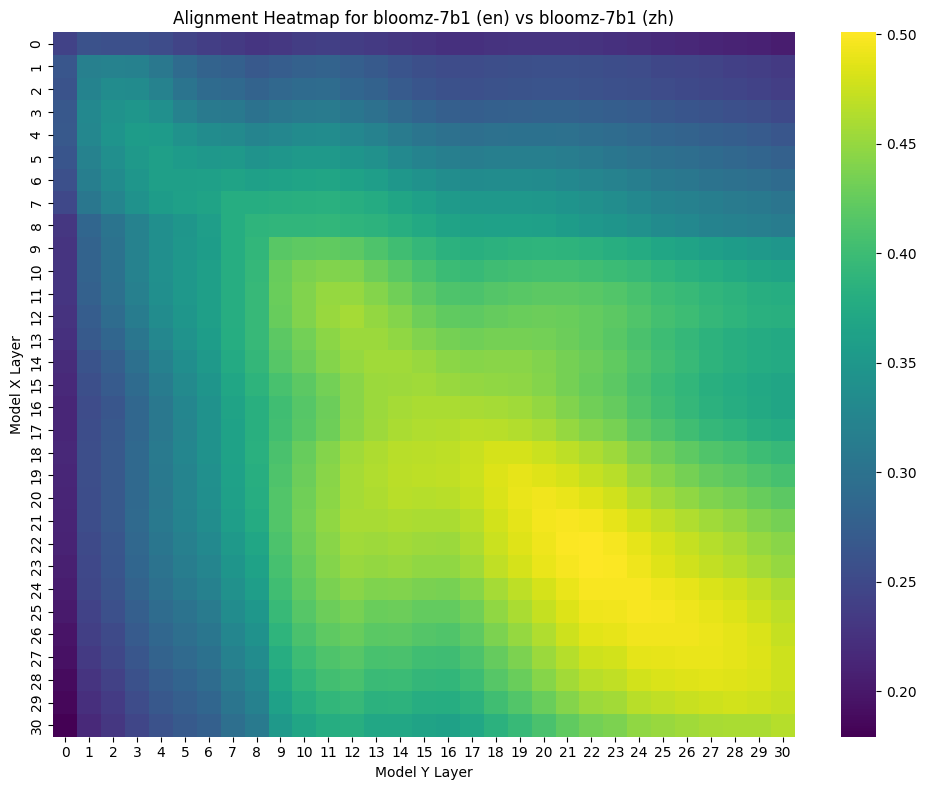


Loading alignment for models 4, 5:
Shape: (27, 31)

Loading alignment for models 4, 6:
Shape: (33, 31)

Loading alignment for models 4, 7:
Shape: (41, 31)

Loading alignment for models 4, 8:
Shape: (33, 31)

Loading alignment for models 5, 0:
Shape: (25, 27)

Loading alignment for models 5, 1:
Shape: (25, 27)

Loading alignment for models 5, 2:
Shape: (25, 27)

Loading alignment for models 5, 3:
Shape: (31, 27)

Loading alignment for models 5, 4:
Shape: (31, 27)

Loading alignment for models 5, 5:
Shape: (27, 27)


/tmp/ipykernel_550/1719720581.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  alignment = torch.load(alignment_path)


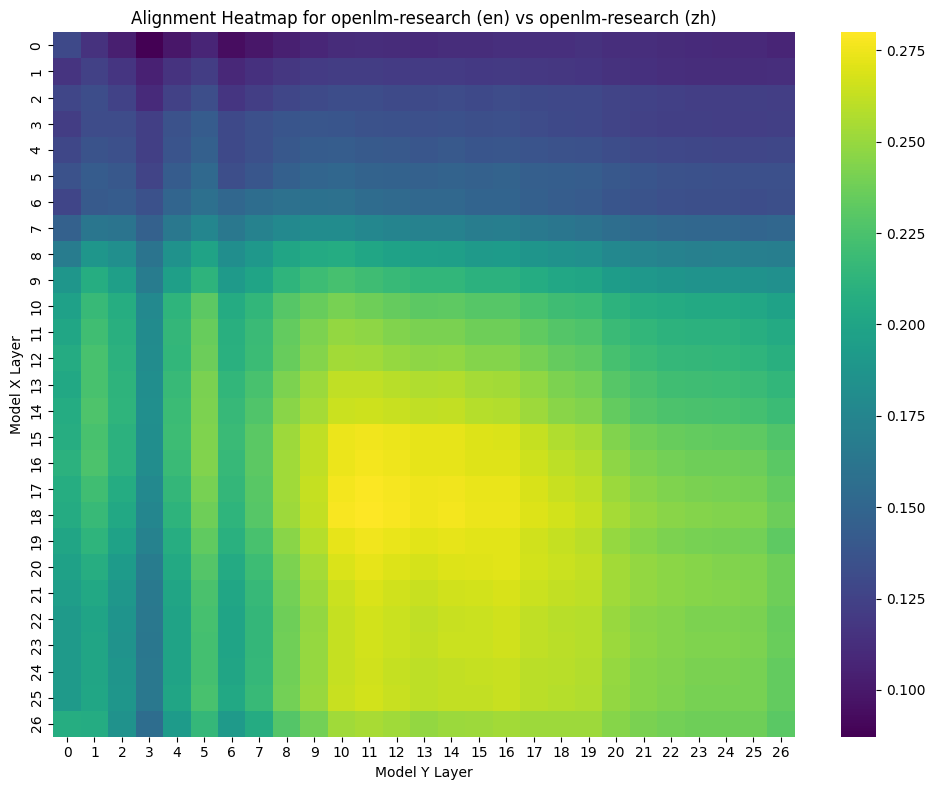


Loading alignment for models 5, 6:
Shape: (33, 27)

Loading alignment for models 5, 7:
Shape: (41, 27)

Loading alignment for models 5, 8:
Shape: (33, 27)

Loading alignment for models 6, 0:
Shape: (25, 33)

Loading alignment for models 6, 1:
Shape: (25, 33)

Loading alignment for models 6, 2:
Shape: (25, 33)

Loading alignment for models 6, 3:
Shape: (31, 33)

Loading alignment for models 6, 4:
Shape: (31, 33)

Loading alignment for models 6, 5:
Shape: (27, 33)

Loading alignment for models 6, 6:
Shape: (33, 33)


/tmp/ipykernel_550/1719720581.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  alignment = torch.load(alignment_path)


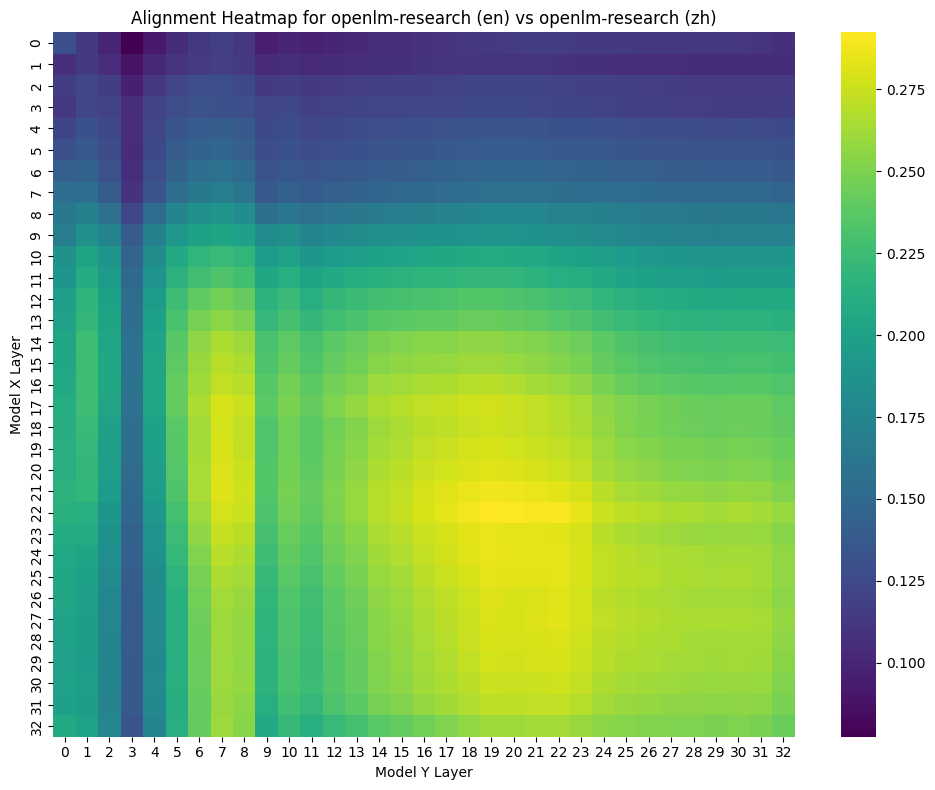


Loading alignment for models 6, 7:
Shape: (41, 33)

Loading alignment for models 6, 8:
Shape: (33, 33)

Loading alignment for models 7, 0:
Shape: (25, 41)

Loading alignment for models 7, 1:
Shape: (25, 41)

Loading alignment for models 7, 2:
Shape: (25, 41)

Loading alignment for models 7, 3:
Shape: (31, 41)

Loading alignment for models 7, 4:
Shape: (31, 41)

Loading alignment for models 7, 5:
Shape: (27, 41)

Loading alignment for models 7, 6:
Shape: (33, 41)

Loading alignment for models 7, 7:
Shape: (41, 41)


/tmp/ipykernel_550/1719720581.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  alignment = torch.load(alignment_path)


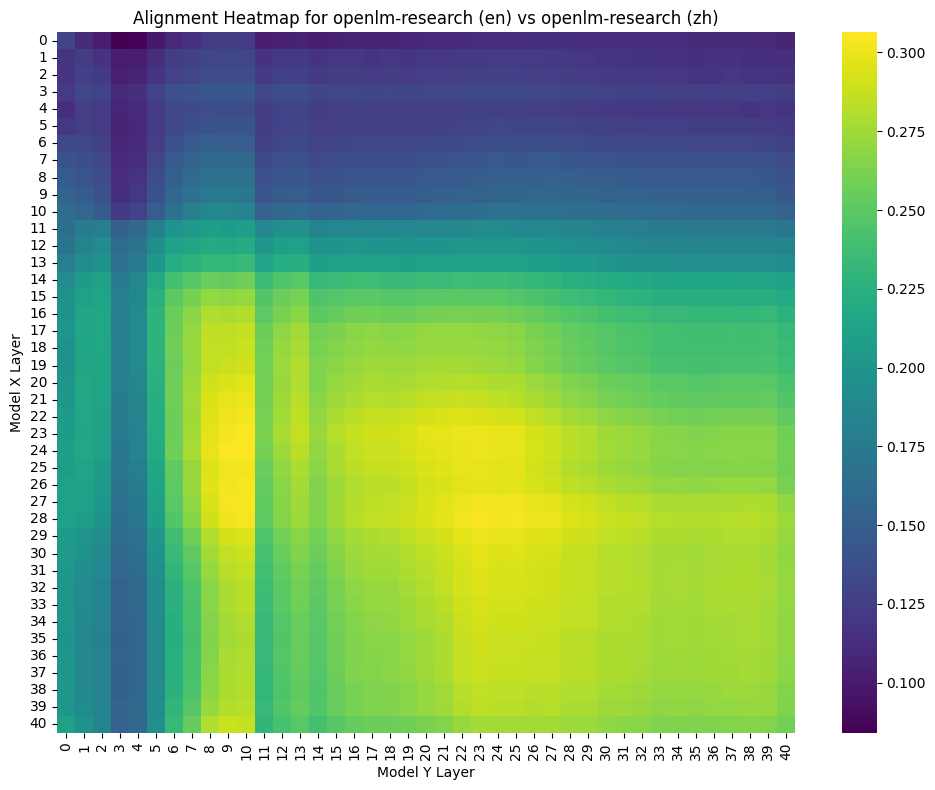


Loading alignment for models 7, 8:
Shape: (33, 41)

Loading alignment for models 8, 0:
Shape: (25, 33)

Loading alignment for models 8, 1:
Shape: (25, 33)

Loading alignment for models 8, 2:
Shape: (25, 33)

Loading alignment for models 8, 3:
Shape: (31, 33)

Loading alignment for models 8, 4:
Shape: (31, 33)

Loading alignment for models 8, 5:
Shape: (27, 33)

Loading alignment for models 8, 6:
Shape: (33, 33)

Loading alignment for models 8, 7:
Shape: (41, 33)

Loading alignment for models 8, 8:
Shape: (33, 33)


/tmp/ipykernel_550/1719720581.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  alignment = torch.load(alignment_path)


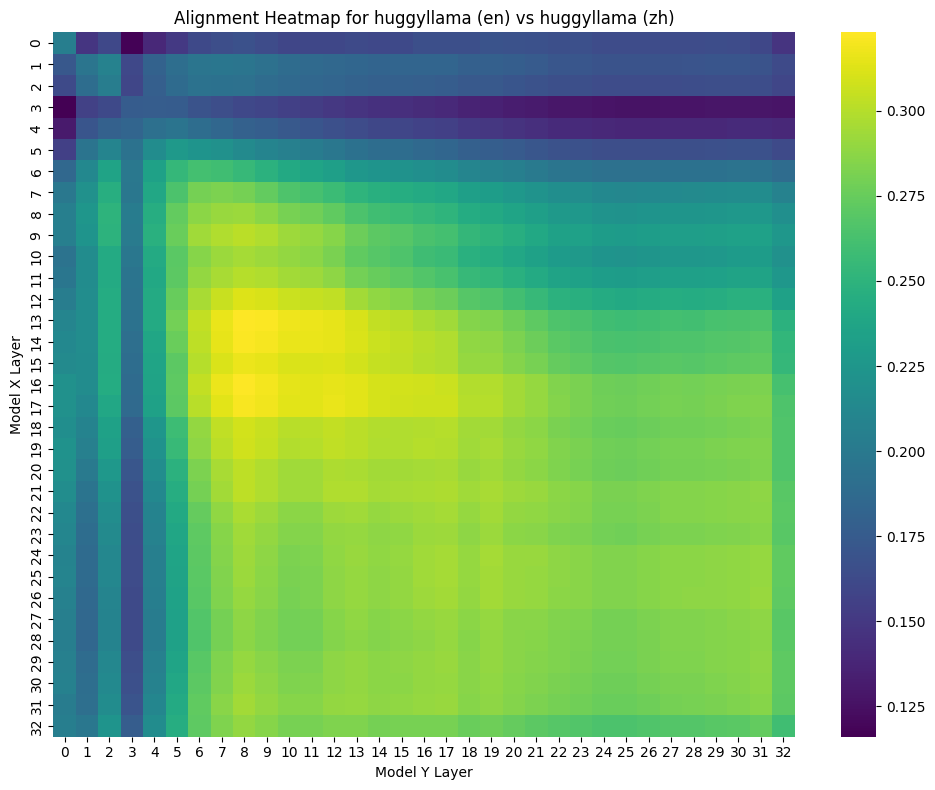

In [15]:
# Load alignment files for different model pairs
import torch
import matplotlib.pyplot as plt
import seaborn as sns

for x in range(9):
    for y in range(9):
        alignment_path = f'results/alignment/en_zh/val/{x}_{y}_alignment.npy'
        print(f"\nLoading alignment for models {x}, {y}:")
        alignment = torch.load(alignment_path)
        print(f"Shape: {alignment.shape}")
        
        if x == y:
            # Create heatmap
            plt.figure(figsize=(10, 8))
            sns.heatmap(alignment, cmap='viridis', annot=False,
                        xticklabels=range(alignment.shape[1]),
                        yticklabels=range(alignment.shape[0]))
            plt.title(f'Alignment Heatmap for {x_path_names[x]} (en) vs {y_path_names[y]} (zh)')
            plt.xlabel('Model Y Layer')
            plt.ylabel('Model X Layer') 
            plt.tight_layout()
            plt.show()


Loading alignment for models 0, 0:
Shape: (25, 25)


/tmp/ipykernel_550/3185217458.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  alignment = torch.load(alignment_path)


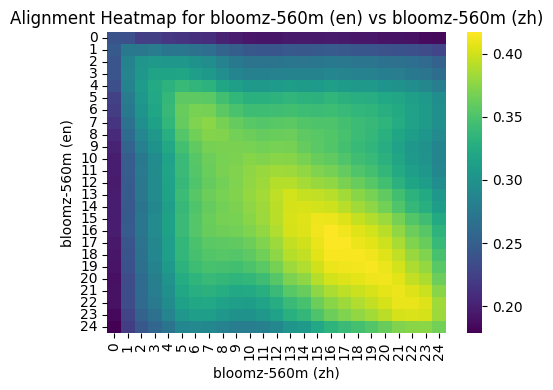


Loading alignment for models 0, 1:
Shape: (25, 25)


/tmp/ipykernel_550/3185217458.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  alignment = torch.load(alignment_path)


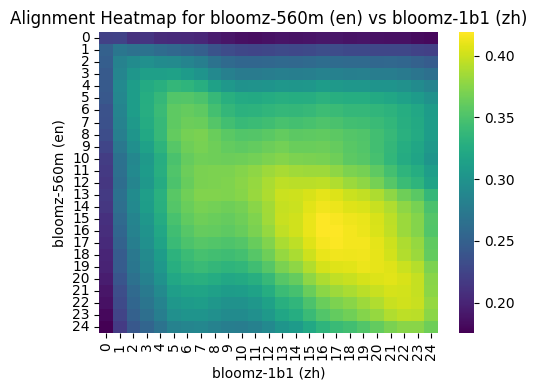


Loading alignment for models 0, 2:
Shape: (25, 25)


/tmp/ipykernel_550/3185217458.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  alignment = torch.load(alignment_path)


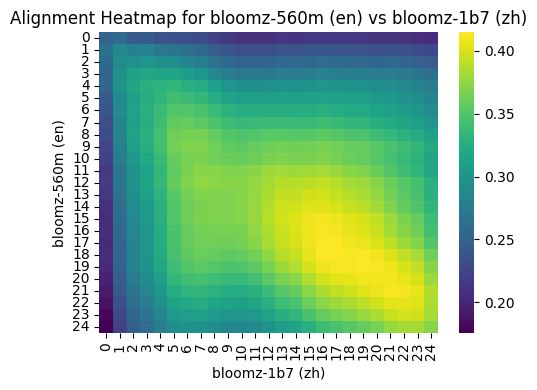


Loading alignment for models 0, 3:
Shape: (31, 25)


/tmp/ipykernel_550/3185217458.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  alignment = torch.load(alignment_path)


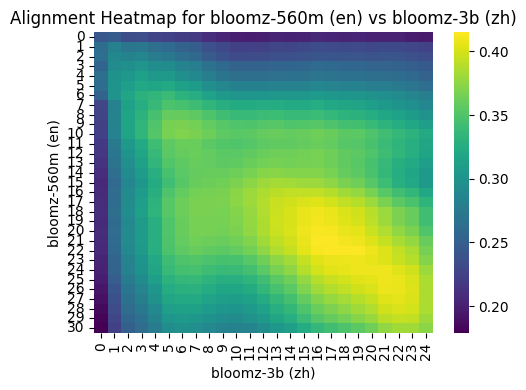


Loading alignment for models 0, 4:
Shape: (31, 25)


/tmp/ipykernel_550/3185217458.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  alignment = torch.load(alignment_path)


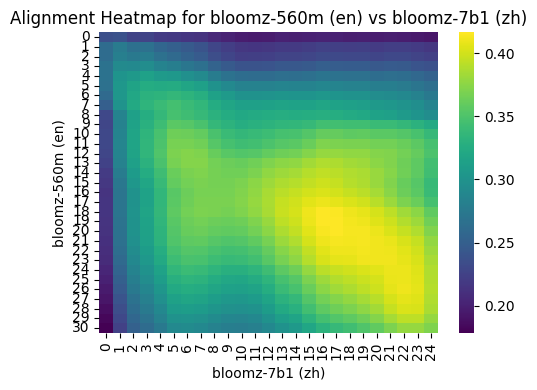


Loading alignment for models 0, 5:
Shape: (27, 25)


/tmp/ipykernel_550/3185217458.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  alignment = torch.load(alignment_path)


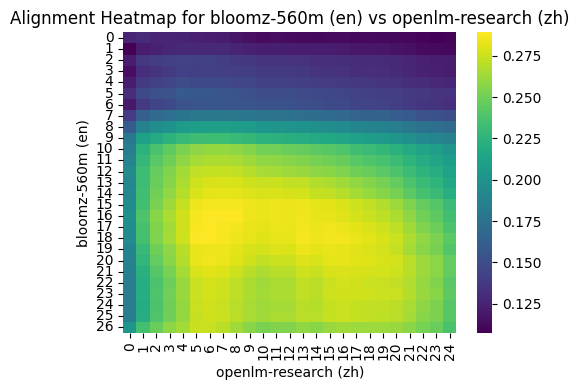


Loading alignment for models 0, 6:
Shape: (33, 25)


/tmp/ipykernel_550/3185217458.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  alignment = torch.load(alignment_path)


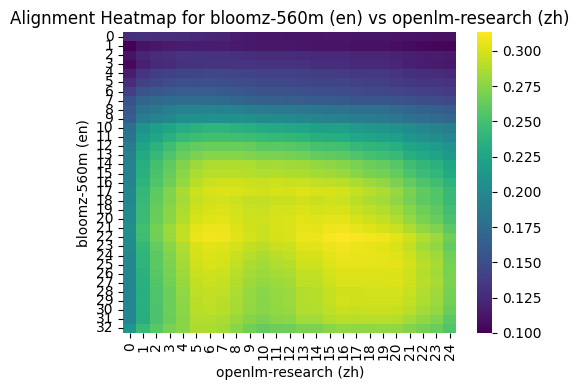


Loading alignment for models 0, 7:
Shape: (41, 25)


/tmp/ipykernel_550/3185217458.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  alignment = torch.load(alignment_path)


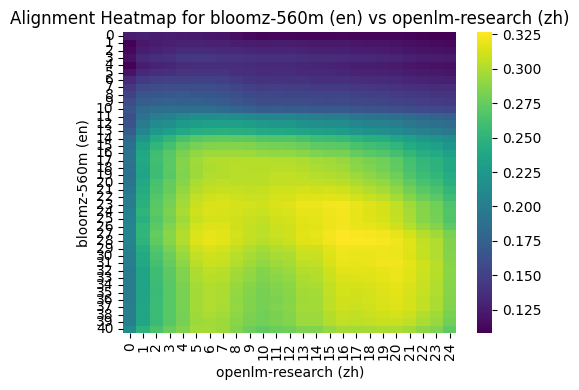


Loading alignment for models 0, 8:
Shape: (33, 25)


/tmp/ipykernel_550/3185217458.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  alignment = torch.load(alignment_path)


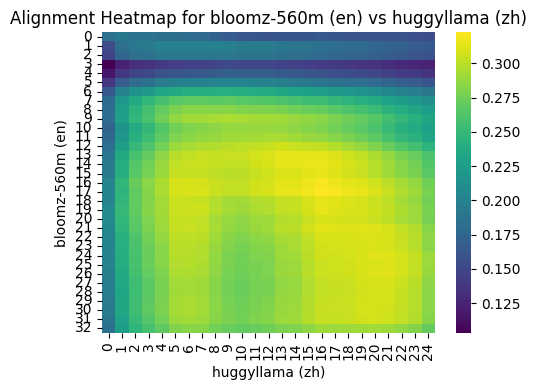


Loading alignment for models 1, 0:
Shape: (25, 25)


/tmp/ipykernel_550/3185217458.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  alignment = torch.load(alignment_path)


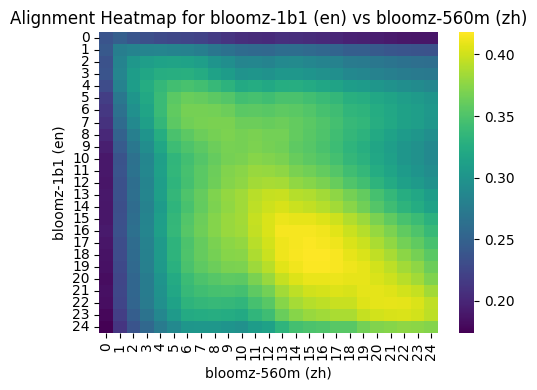


Loading alignment for models 1, 1:
Shape: (25, 25)


/tmp/ipykernel_550/3185217458.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  alignment = torch.load(alignment_path)


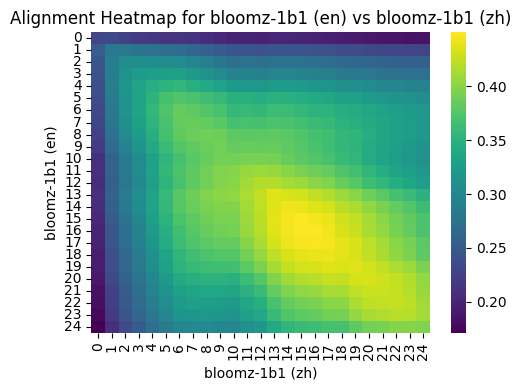


Loading alignment for models 1, 2:
Shape: (25, 25)


/tmp/ipykernel_550/3185217458.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  alignment = torch.load(alignment_path)


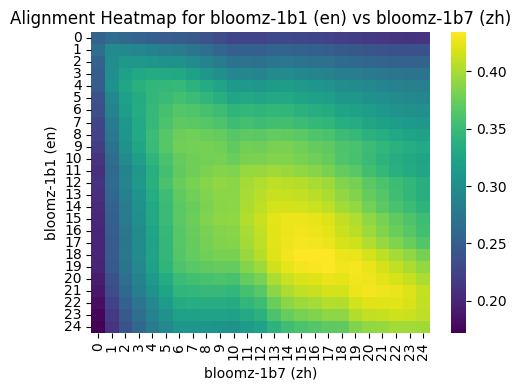


Loading alignment for models 1, 3:
Shape: (31, 25)


/tmp/ipykernel_550/3185217458.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  alignment = torch.load(alignment_path)


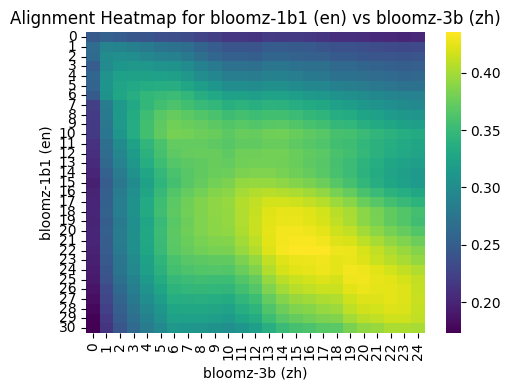


Loading alignment for models 1, 4:
Shape: (31, 25)


/tmp/ipykernel_550/3185217458.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  alignment = torch.load(alignment_path)


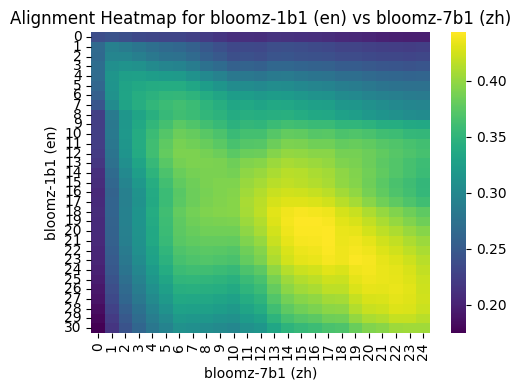


Loading alignment for models 1, 5:
Shape: (27, 25)


/tmp/ipykernel_550/3185217458.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  alignment = torch.load(alignment_path)


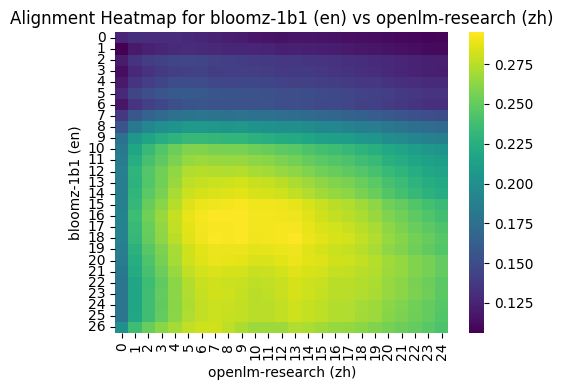


Loading alignment for models 1, 6:
Shape: (33, 25)


/tmp/ipykernel_550/3185217458.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  alignment = torch.load(alignment_path)


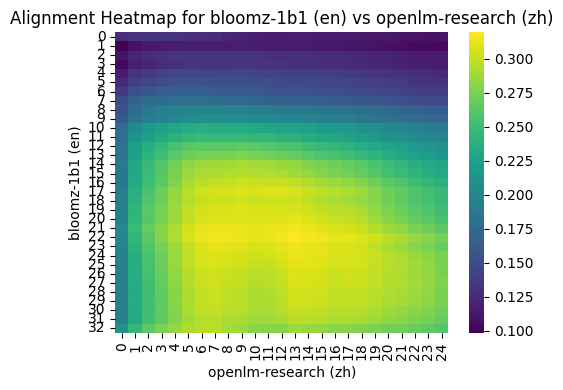


Loading alignment for models 1, 7:
Shape: (41, 25)


/tmp/ipykernel_550/3185217458.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  alignment = torch.load(alignment_path)


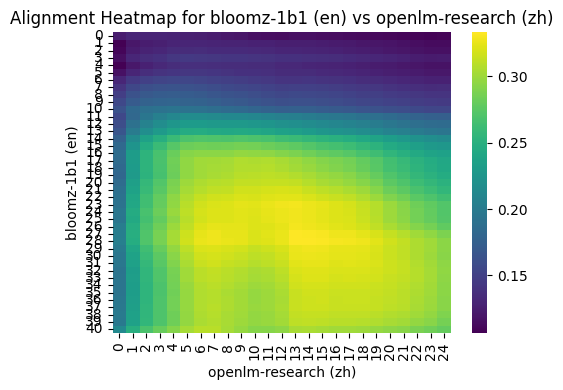


Loading alignment for models 1, 8:
Shape: (33, 25)


/tmp/ipykernel_550/3185217458.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  alignment = torch.load(alignment_path)


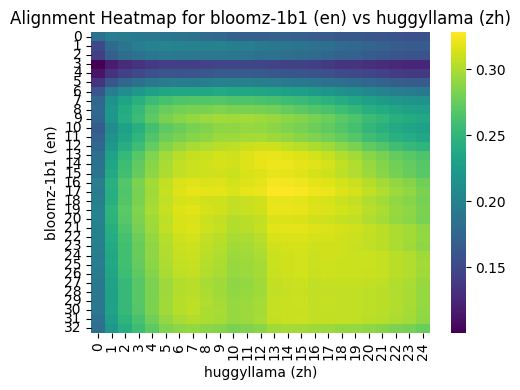


Loading alignment for models 2, 0:
Shape: (25, 25)


/tmp/ipykernel_550/3185217458.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  alignment = torch.load(alignment_path)


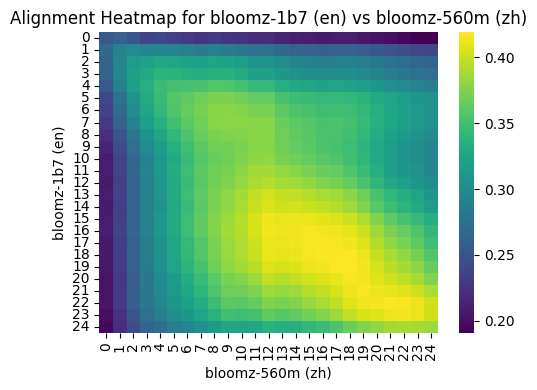


Loading alignment for models 2, 1:
Shape: (25, 25)


/tmp/ipykernel_550/3185217458.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  alignment = torch.load(alignment_path)


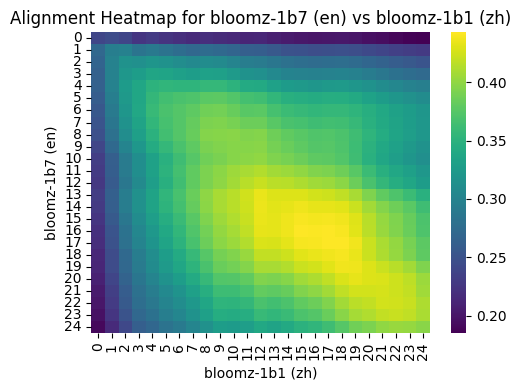


Loading alignment for models 2, 2:
Shape: (25, 25)


/tmp/ipykernel_550/3185217458.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  alignment = torch.load(alignment_path)


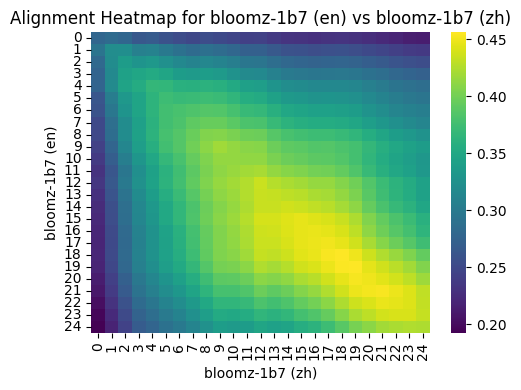


Loading alignment for models 2, 3:
Shape: (31, 25)


/tmp/ipykernel_550/3185217458.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  alignment = torch.load(alignment_path)


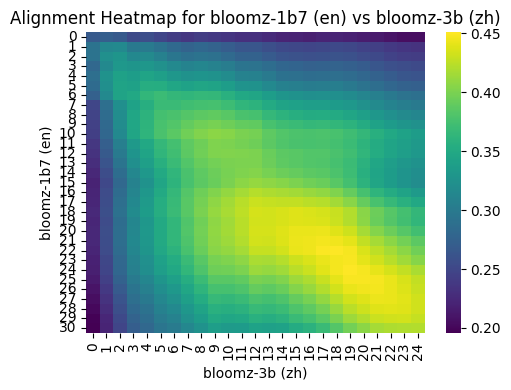


Loading alignment for models 2, 4:
Shape: (31, 25)


/tmp/ipykernel_550/3185217458.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  alignment = torch.load(alignment_path)


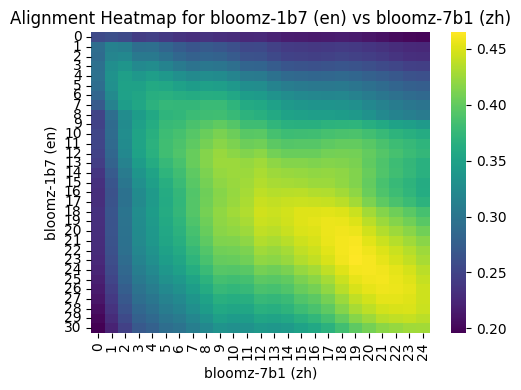


Loading alignment for models 2, 5:
Shape: (27, 25)


/tmp/ipykernel_550/3185217458.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  alignment = torch.load(alignment_path)


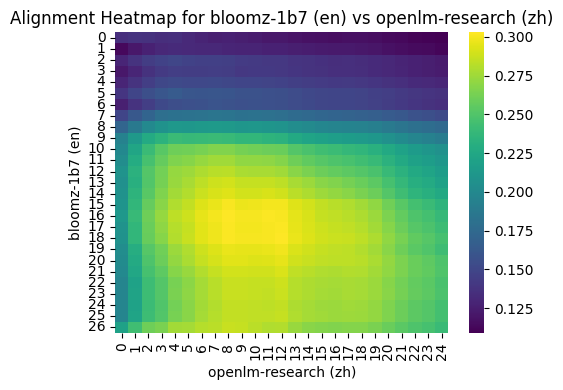


Loading alignment for models 2, 6:
Shape: (33, 25)


/tmp/ipykernel_550/3185217458.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  alignment = torch.load(alignment_path)


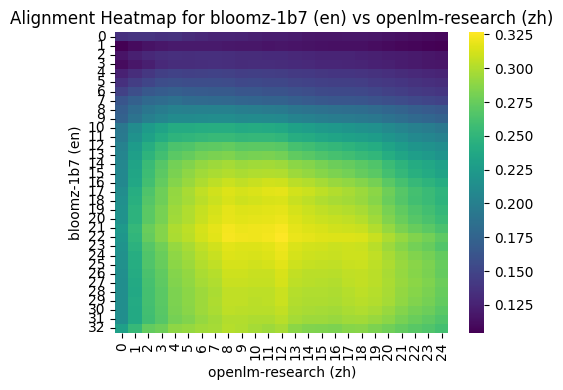


Loading alignment for models 2, 7:
Shape: (41, 25)


/tmp/ipykernel_550/3185217458.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  alignment = torch.load(alignment_path)


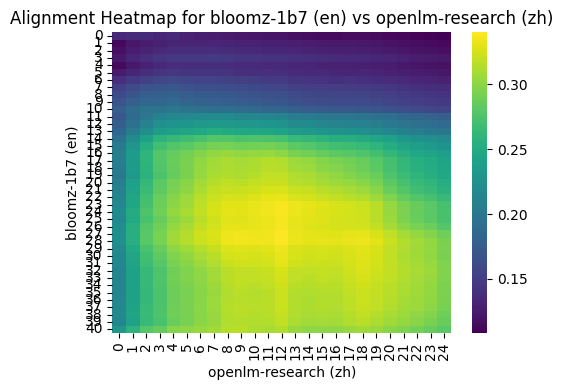


Loading alignment for models 2, 8:
Shape: (33, 25)


/tmp/ipykernel_550/3185217458.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  alignment = torch.load(alignment_path)


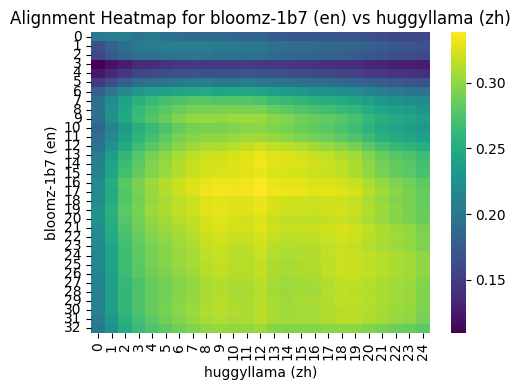


Loading alignment for models 3, 0:
Shape: (25, 31)


/tmp/ipykernel_550/3185217458.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  alignment = torch.load(alignment_path)


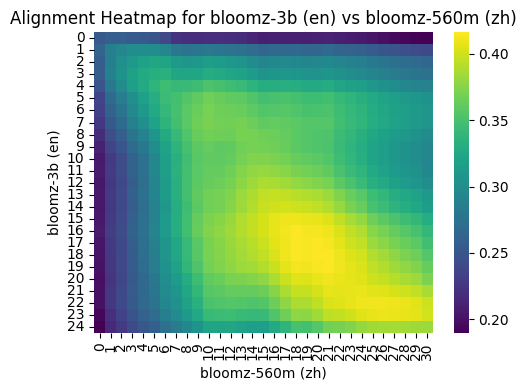


Loading alignment for models 3, 1:
Shape: (25, 31)


/tmp/ipykernel_550/3185217458.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  alignment = torch.load(alignment_path)


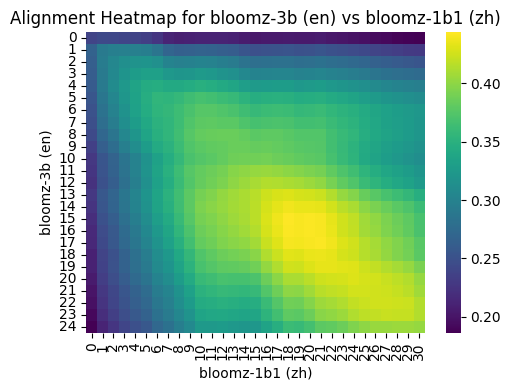


Loading alignment for models 3, 2:
Shape: (25, 31)


/tmp/ipykernel_550/3185217458.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  alignment = torch.load(alignment_path)


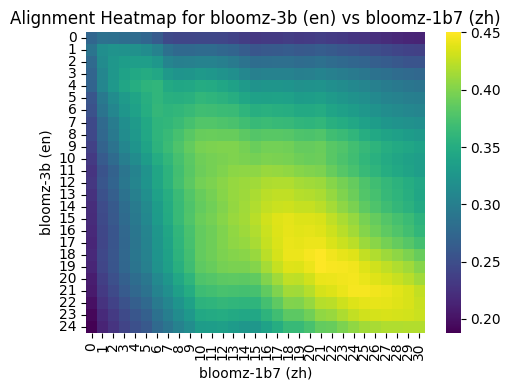


Loading alignment for models 3, 3:
Shape: (31, 31)


/tmp/ipykernel_550/3185217458.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  alignment = torch.load(alignment_path)


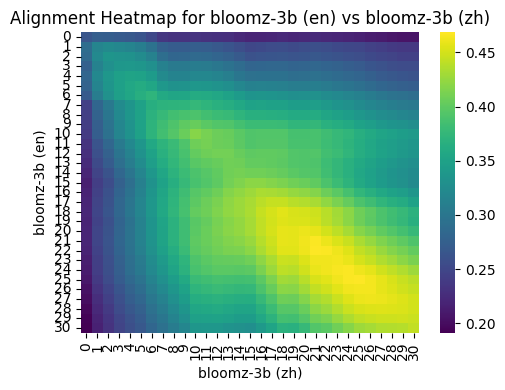


Loading alignment for models 3, 4:
Shape: (31, 31)


/tmp/ipykernel_550/3185217458.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  alignment = torch.load(alignment_path)


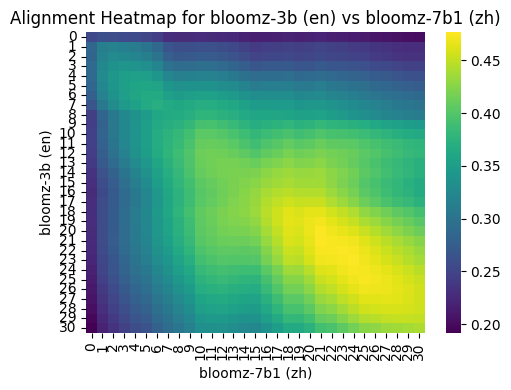


Loading alignment for models 3, 5:
Shape: (27, 31)


/tmp/ipykernel_550/3185217458.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  alignment = torch.load(alignment_path)


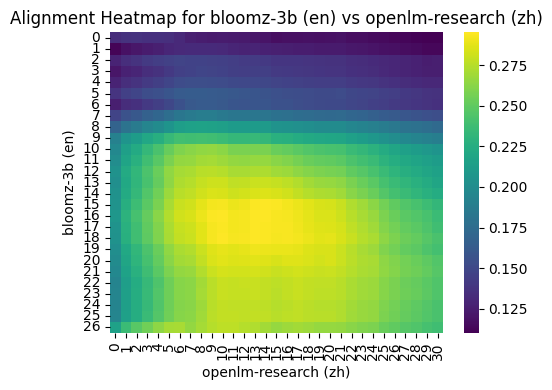


Loading alignment for models 3, 6:
Shape: (33, 31)


/tmp/ipykernel_550/3185217458.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  alignment = torch.load(alignment_path)


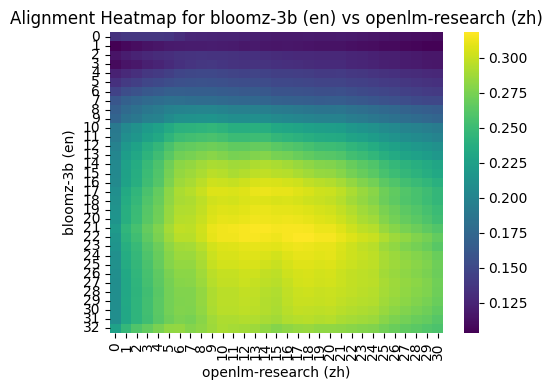


Loading alignment for models 3, 7:
Shape: (41, 31)


/tmp/ipykernel_550/3185217458.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  alignment = torch.load(alignment_path)


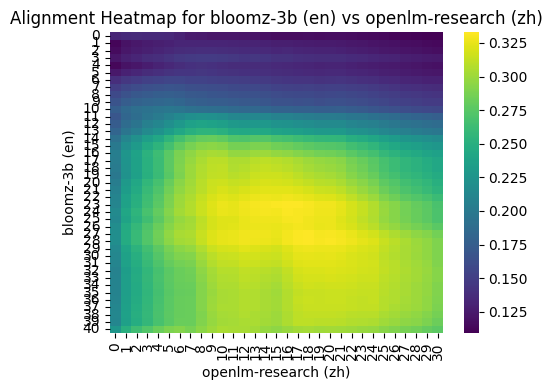


Loading alignment for models 3, 8:
Shape: (33, 31)


/tmp/ipykernel_550/3185217458.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  alignment = torch.load(alignment_path)


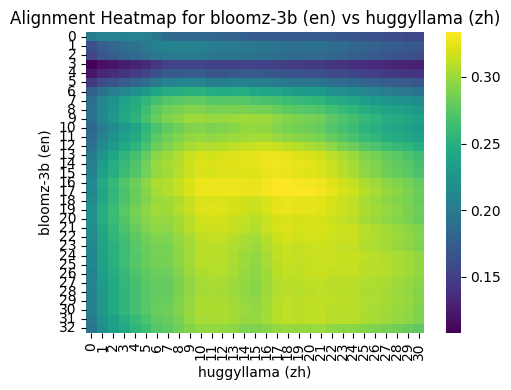


Loading alignment for models 4, 0:
Shape: (25, 31)


/tmp/ipykernel_550/3185217458.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  alignment = torch.load(alignment_path)


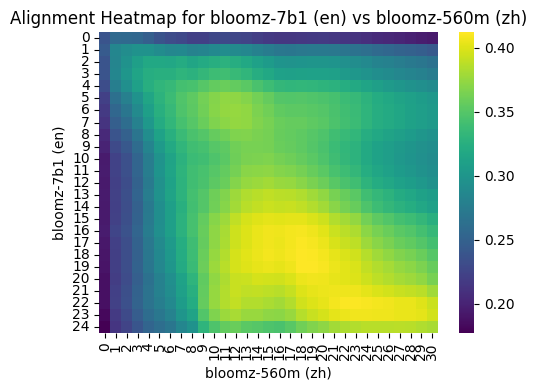


Loading alignment for models 4, 1:
Shape: (25, 31)


/tmp/ipykernel_550/3185217458.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  alignment = torch.load(alignment_path)


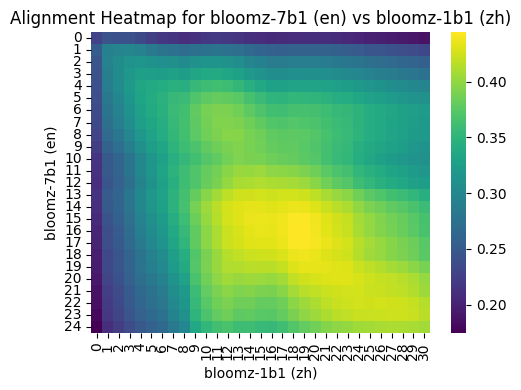


Loading alignment for models 4, 2:
Shape: (25, 31)


/tmp/ipykernel_550/3185217458.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  alignment = torch.load(alignment_path)


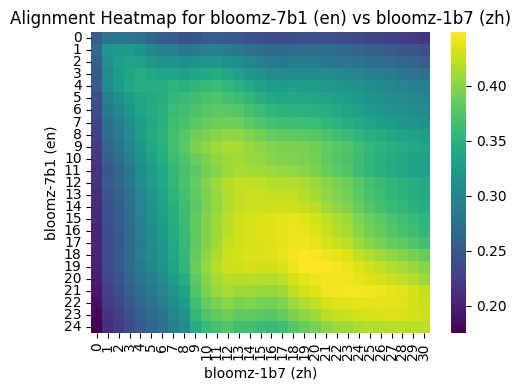


Loading alignment for models 4, 3:
Shape: (31, 31)


/tmp/ipykernel_550/3185217458.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  alignment = torch.load(alignment_path)


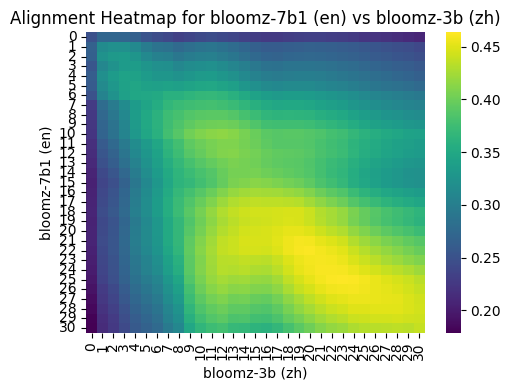


Loading alignment for models 4, 4:
Shape: (31, 31)


/tmp/ipykernel_550/3185217458.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  alignment = torch.load(alignment_path)


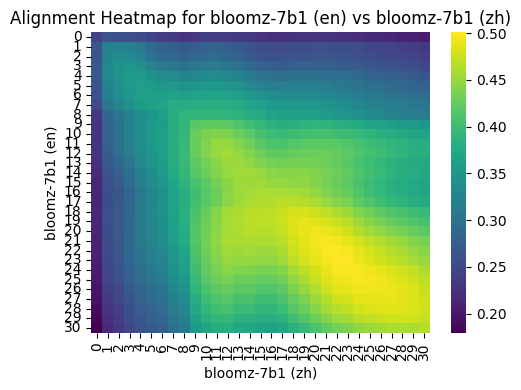


Loading alignment for models 4, 5:
Shape: (27, 31)


/tmp/ipykernel_550/3185217458.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  alignment = torch.load(alignment_path)


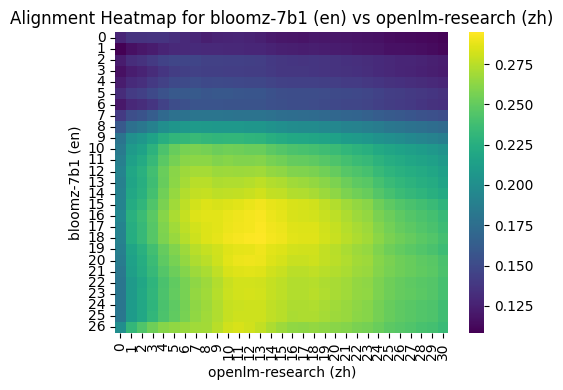


Loading alignment for models 4, 6:
Shape: (33, 31)


/tmp/ipykernel_550/3185217458.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  alignment = torch.load(alignment_path)


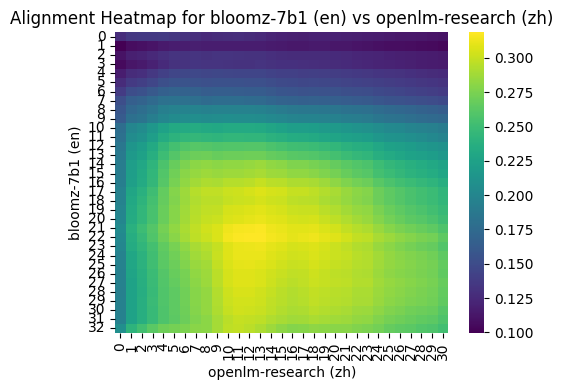


Loading alignment for models 4, 7:
Shape: (41, 31)


/tmp/ipykernel_550/3185217458.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  alignment = torch.load(alignment_path)


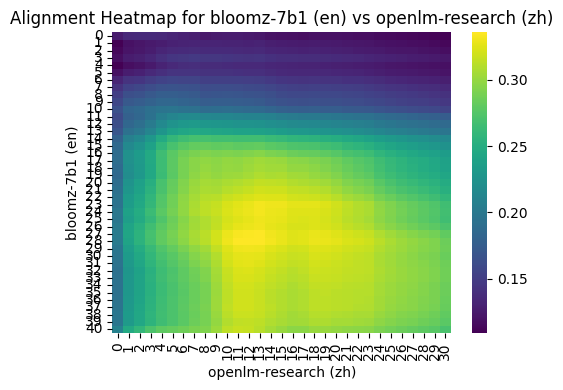


Loading alignment for models 4, 8:
Shape: (33, 31)


/tmp/ipykernel_550/3185217458.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  alignment = torch.load(alignment_path)


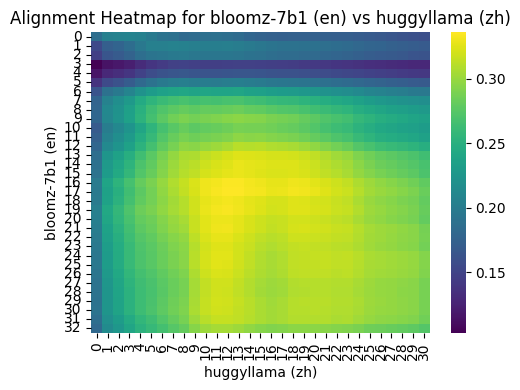


Loading alignment for models 5, 0:
Shape: (25, 27)


/tmp/ipykernel_550/3185217458.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  alignment = torch.load(alignment_path)


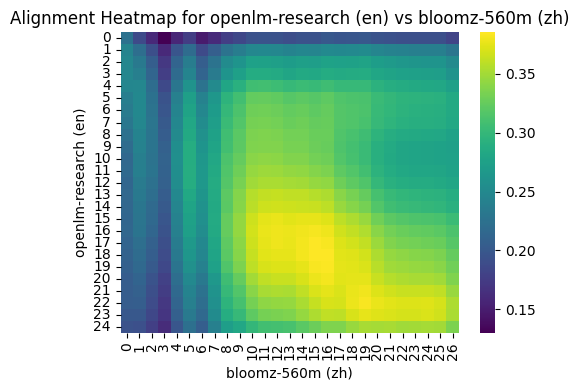


Loading alignment for models 5, 1:
Shape: (25, 27)


/tmp/ipykernel_550/3185217458.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  alignment = torch.load(alignment_path)


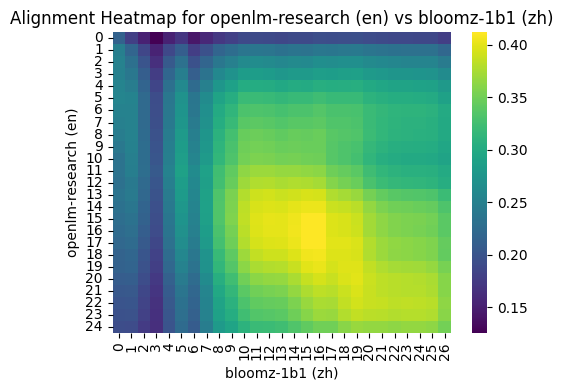


Loading alignment for models 5, 2:
Shape: (25, 27)


/tmp/ipykernel_550/3185217458.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  alignment = torch.load(alignment_path)


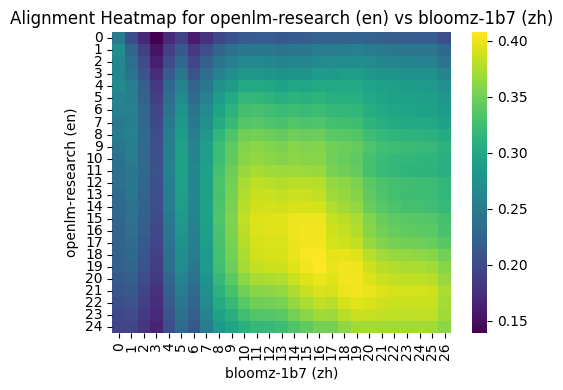


Loading alignment for models 5, 3:
Shape: (31, 27)


/tmp/ipykernel_550/3185217458.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  alignment = torch.load(alignment_path)


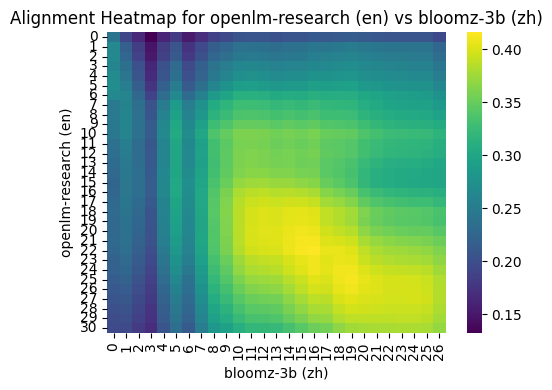


Loading alignment for models 5, 4:
Shape: (31, 27)


/tmp/ipykernel_550/3185217458.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  alignment = torch.load(alignment_path)


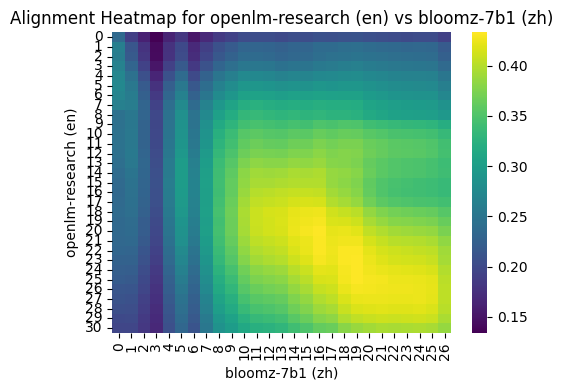


Loading alignment for models 5, 5:
Shape: (27, 27)


/tmp/ipykernel_550/3185217458.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  alignment = torch.load(alignment_path)


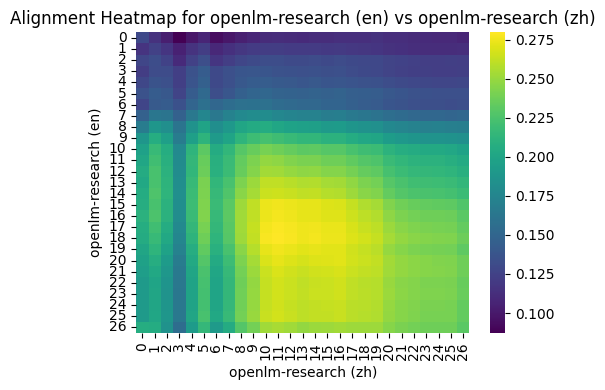


Loading alignment for models 5, 6:
Shape: (33, 27)


/tmp/ipykernel_550/3185217458.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  alignment = torch.load(alignment_path)


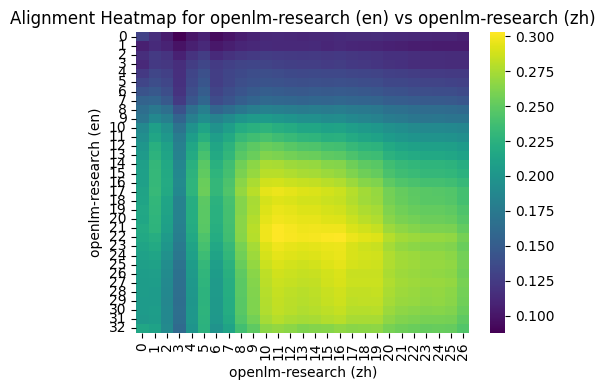


Loading alignment for models 5, 7:
Shape: (41, 27)


/tmp/ipykernel_550/3185217458.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  alignment = torch.load(alignment_path)


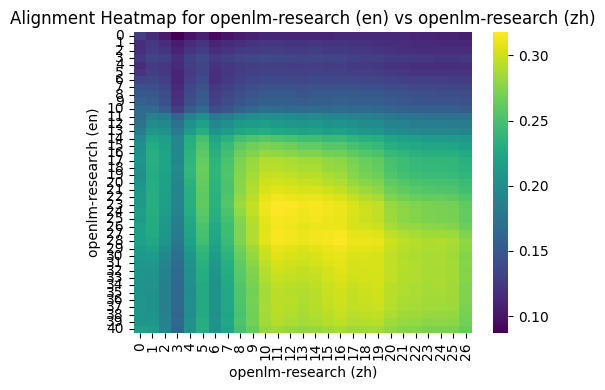


Loading alignment for models 5, 8:
Shape: (33, 27)


/tmp/ipykernel_550/3185217458.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  alignment = torch.load(alignment_path)


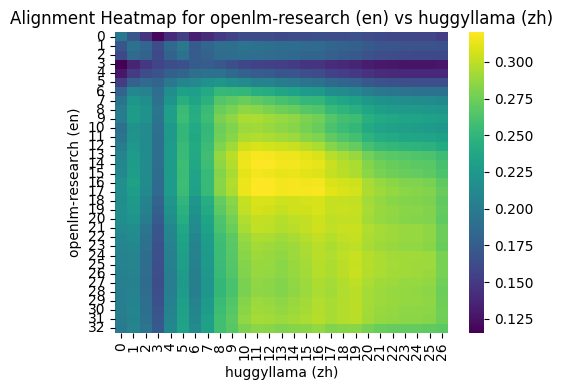


Loading alignment for models 6, 0:
Shape: (25, 33)


/tmp/ipykernel_550/3185217458.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  alignment = torch.load(alignment_path)


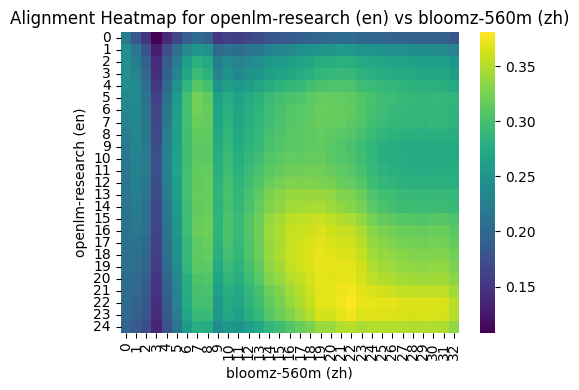


Loading alignment for models 6, 1:
Shape: (25, 33)


/tmp/ipykernel_550/3185217458.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  alignment = torch.load(alignment_path)


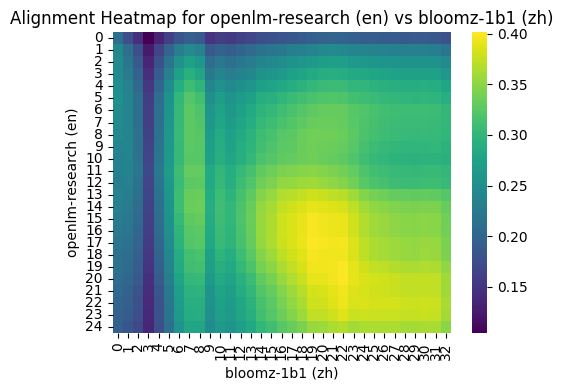


Loading alignment for models 6, 2:
Shape: (25, 33)


/tmp/ipykernel_550/3185217458.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  alignment = torch.load(alignment_path)


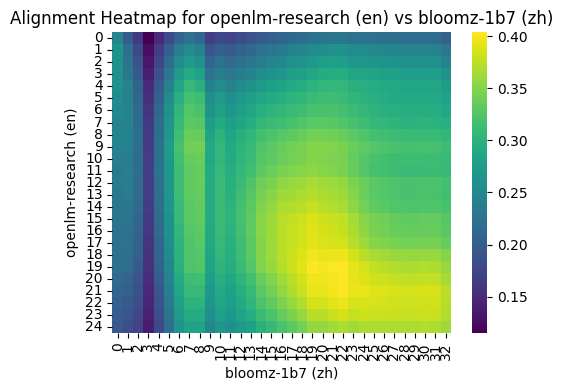


Loading alignment for models 6, 3:
Shape: (31, 33)


/tmp/ipykernel_550/3185217458.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  alignment = torch.load(alignment_path)


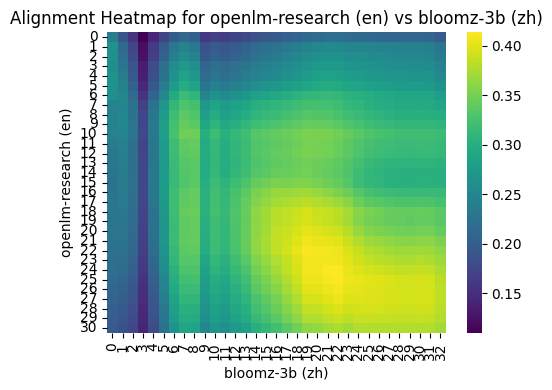


Loading alignment for models 6, 4:
Shape: (31, 33)


/tmp/ipykernel_550/3185217458.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  alignment = torch.load(alignment_path)


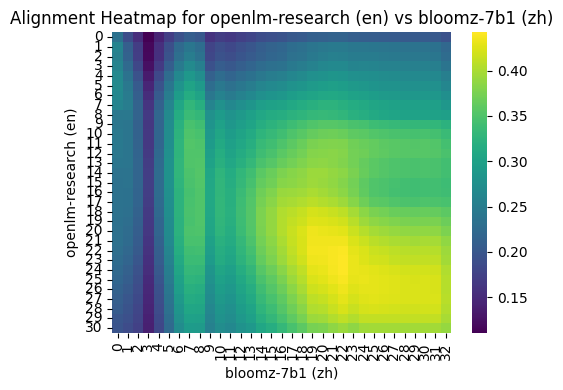


Loading alignment for models 6, 5:
Shape: (27, 33)


/tmp/ipykernel_550/3185217458.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  alignment = torch.load(alignment_path)


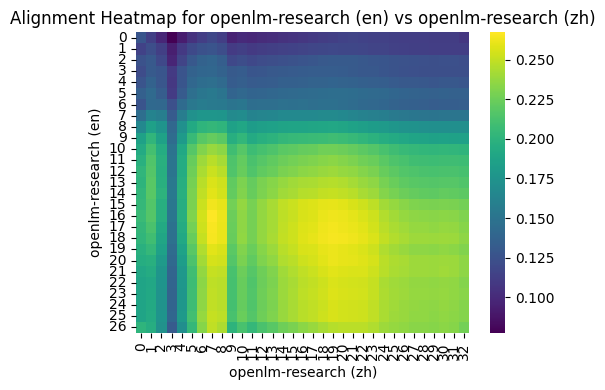


Loading alignment for models 6, 6:
Shape: (33, 33)


/tmp/ipykernel_550/3185217458.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  alignment = torch.load(alignment_path)


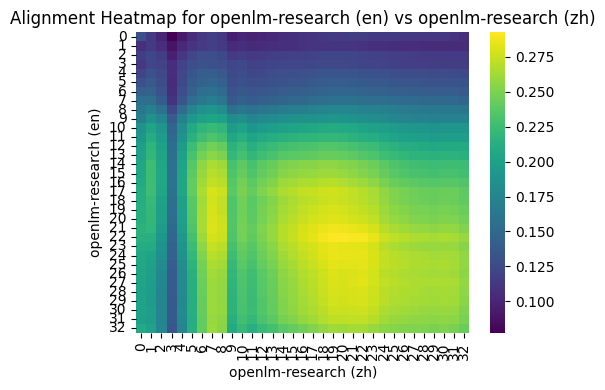


Loading alignment for models 6, 7:
Shape: (41, 33)


/tmp/ipykernel_550/3185217458.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  alignment = torch.load(alignment_path)


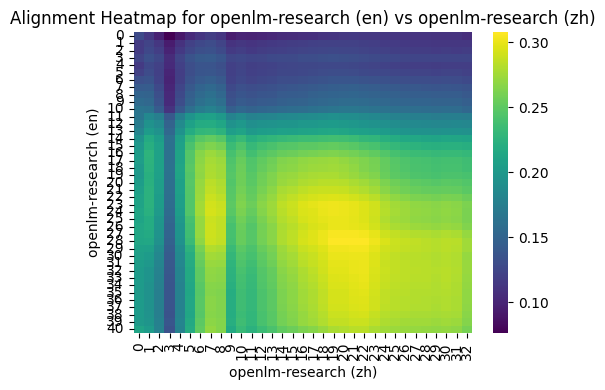


Loading alignment for models 6, 8:
Shape: (33, 33)


/tmp/ipykernel_550/3185217458.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  alignment = torch.load(alignment_path)


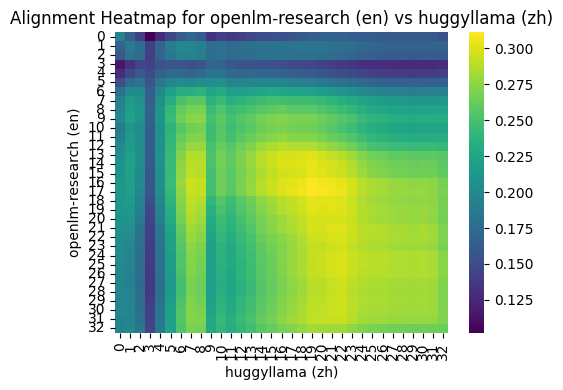


Loading alignment for models 7, 0:
Shape: (25, 41)


/tmp/ipykernel_550/3185217458.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  alignment = torch.load(alignment_path)


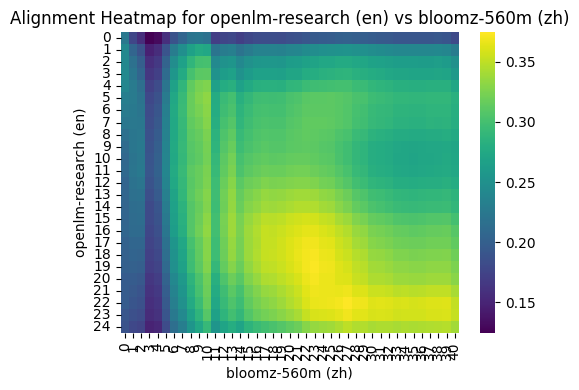


Loading alignment for models 7, 1:
Shape: (25, 41)


/tmp/ipykernel_550/3185217458.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  alignment = torch.load(alignment_path)


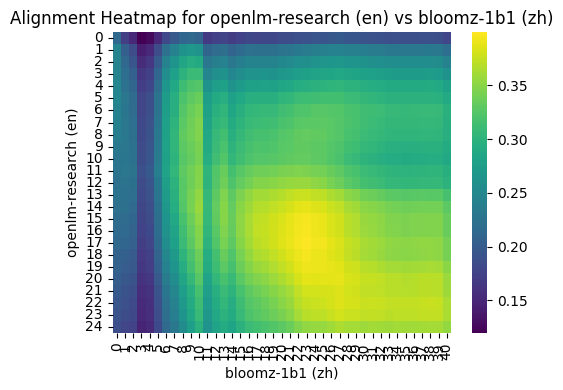


Loading alignment for models 7, 2:
Shape: (25, 41)


/tmp/ipykernel_550/3185217458.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  alignment = torch.load(alignment_path)


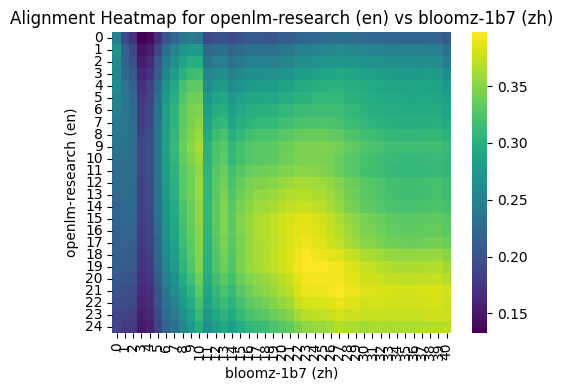


Loading alignment for models 7, 3:
Shape: (31, 41)


/tmp/ipykernel_550/3185217458.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  alignment = torch.load(alignment_path)


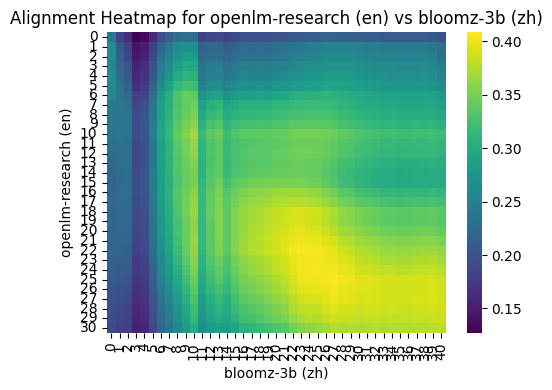


Loading alignment for models 7, 4:
Shape: (31, 41)


/tmp/ipykernel_550/3185217458.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  alignment = torch.load(alignment_path)


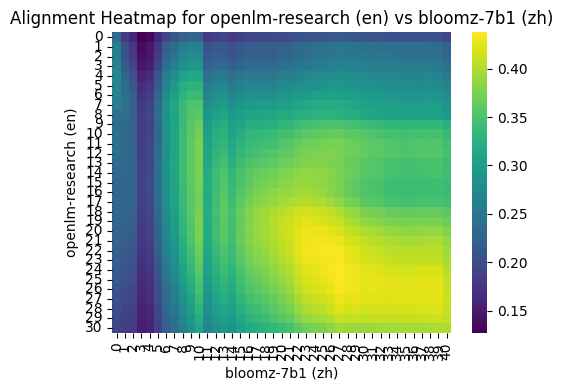


Loading alignment for models 7, 5:
Shape: (27, 41)


/tmp/ipykernel_550/3185217458.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  alignment = torch.load(alignment_path)


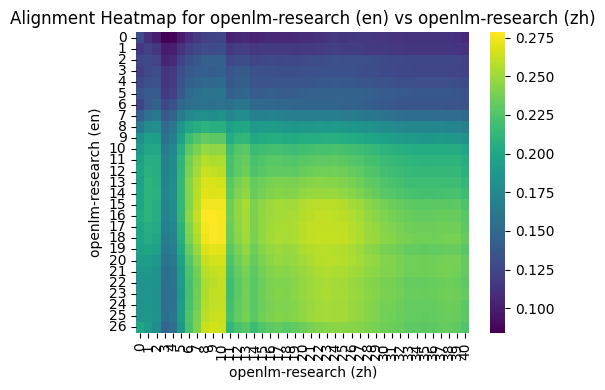


Loading alignment for models 7, 6:
Shape: (33, 41)


/tmp/ipykernel_550/3185217458.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  alignment = torch.load(alignment_path)


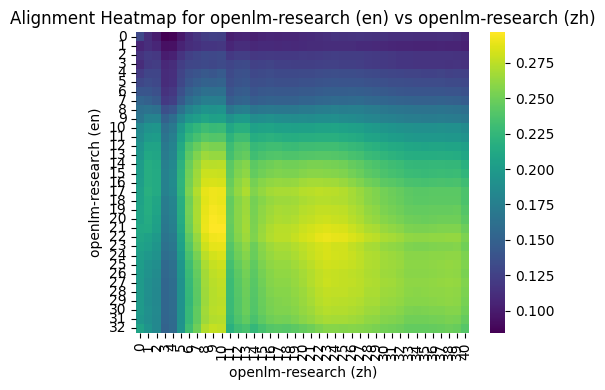


Loading alignment for models 7, 7:
Shape: (41, 41)


/tmp/ipykernel_550/3185217458.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  alignment = torch.load(alignment_path)


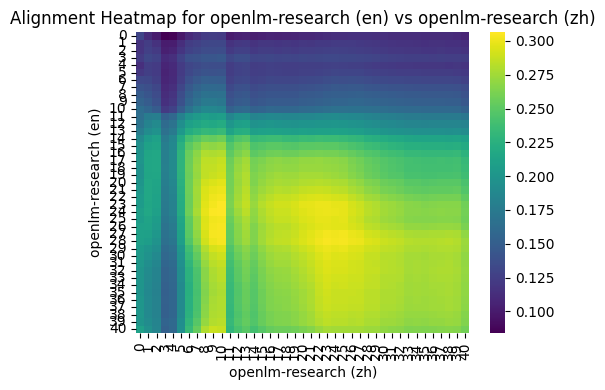


Loading alignment for models 7, 8:
Shape: (33, 41)


/tmp/ipykernel_550/3185217458.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  alignment = torch.load(alignment_path)


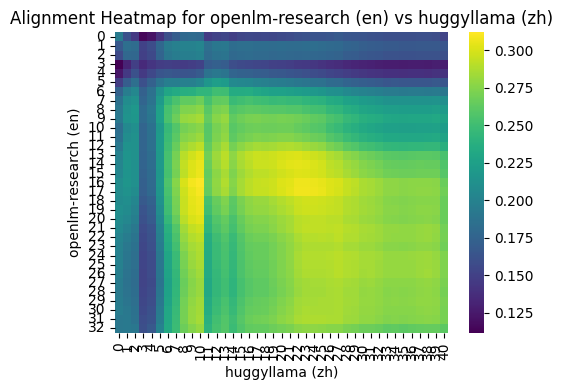


Loading alignment for models 8, 0:
Shape: (25, 33)


/tmp/ipykernel_550/3185217458.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  alignment = torch.load(alignment_path)


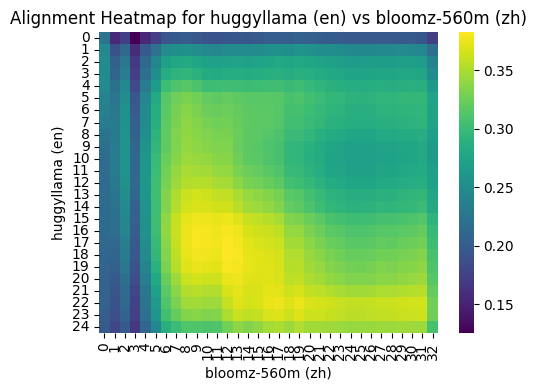


Loading alignment for models 8, 1:
Shape: (25, 33)


/tmp/ipykernel_550/3185217458.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  alignment = torch.load(alignment_path)


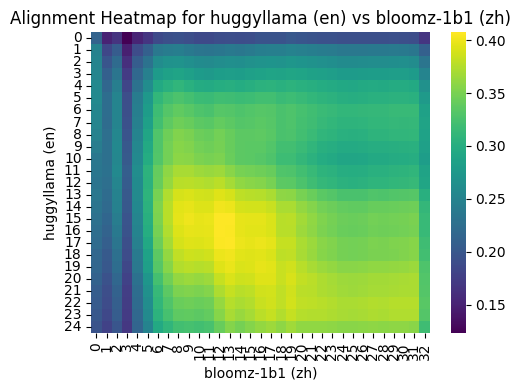


Loading alignment for models 8, 2:
Shape: (25, 33)


/tmp/ipykernel_550/3185217458.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  alignment = torch.load(alignment_path)


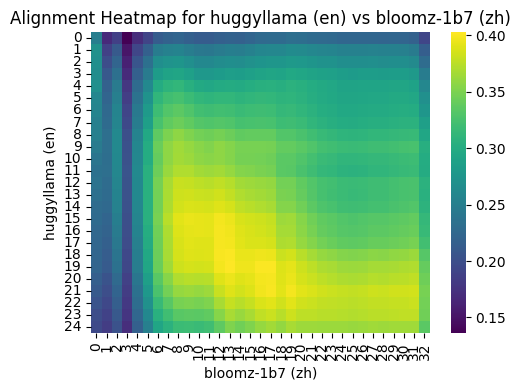


Loading alignment for models 8, 3:
Shape: (31, 33)


/tmp/ipykernel_550/3185217458.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  alignment = torch.load(alignment_path)


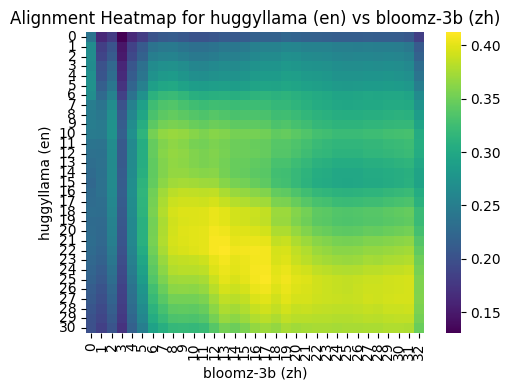


Loading alignment for models 8, 4:
Shape: (31, 33)


/tmp/ipykernel_550/3185217458.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  alignment = torch.load(alignment_path)


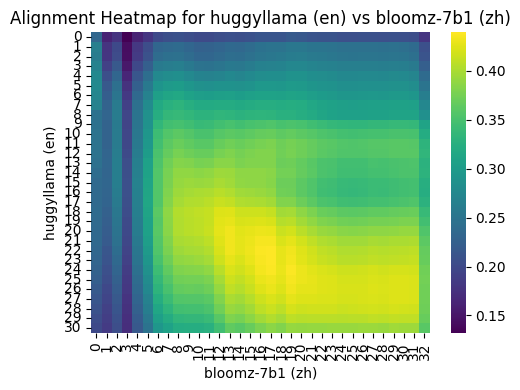


Loading alignment for models 8, 5:
Shape: (27, 33)


/tmp/ipykernel_550/3185217458.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  alignment = torch.load(alignment_path)


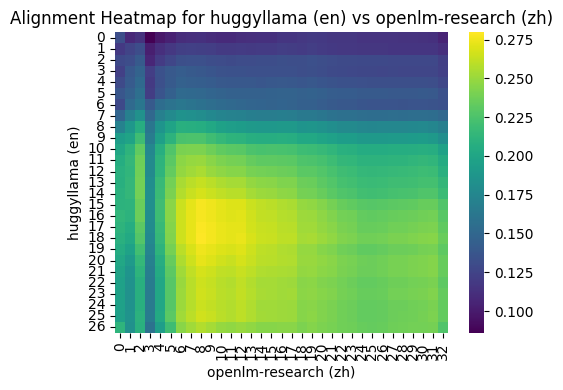


Loading alignment for models 8, 6:
Shape: (33, 33)


/tmp/ipykernel_550/3185217458.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  alignment = torch.load(alignment_path)


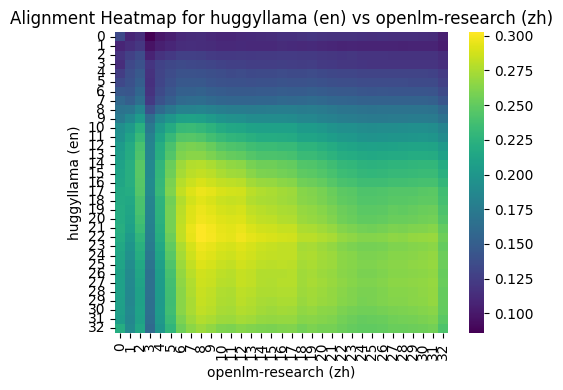


Loading alignment for models 8, 7:
Shape: (41, 33)


/tmp/ipykernel_550/3185217458.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  alignment = torch.load(alignment_path)


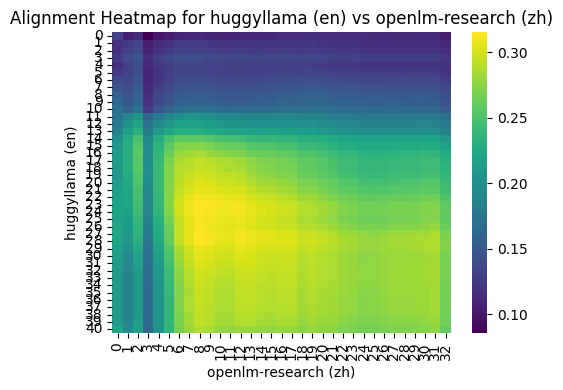


Loading alignment for models 8, 8:
Shape: (33, 33)


/tmp/ipykernel_550/3185217458.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  alignment = torch.load(alignment_path)


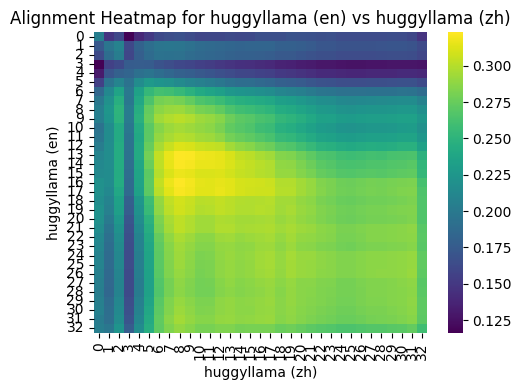

In [18]:
# Load alignment files for different model pairs
import torch
import matplotlib.pyplot as plt
import seaborn as sns

for x in range(9):
    for y in range(9):
        alignment_path = f'results/alignment/en_zh/val/{x}_{y}_alignment.npy'
        print(f"\nLoading alignment for models {x}, {y}:")
        alignment = torch.load(alignment_path)
        print(f"Shape: {alignment.shape}")
        
        # Create heatmap
        plt.figure(figsize=(5, 4))
        sns.heatmap(alignment, cmap='viridis', annot=False,
                    xticklabels=range(alignment.shape[1]),
                    yticklabels=range(alignment.shape[0]))
        plt.title(f'Alignment Heatmap for {x_path_names[x]} (en) vs {y_path_names[y]} (zh)')
        plt.xlabel(f'{y_path_names[y]} (zh)')
        plt.ylabel(f'{x_path_names[x]} (en)') 
        plt.tight_layout()
        plt.show()

In [2]:
import numpy as np
import os
import pickle

all_alignment_dir = 'results/alignment/en_zh/val/all_alignments_language_pool-avg_prompt-False_language_pool-avg_prompt-False/'
alignment_file = os.path.join(all_alignment_dir, 'mutual_knn_k10.pkl')
with open(alignment_file, 'rb') as f:
    result = pickle.load(f)

print("\nMutual KNN k=10 file contents:")
for key, value in result.items():
    print(f"\n{key}:")
    print(value)
    print(f"Shape: {value.shape if hasattr(value, 'shape') else len(value)}")



Mutual KNN k=10 file contents:

(0, 0):
[[0.28090002 0.25877502 0.23145002 0.23495001 0.22340002 0.22417502
  0.22085001 0.22182501 0.21050002 0.20665002 0.20307501 0.20397501
  0.20395001 0.20600002 0.20290002 0.20230001 0.20240001 0.20130001
  0.19752501 0.19632501 0.19187501 0.19057501 0.18530001 0.18160001
  0.17817501]
 [0.27507502 0.30887503 0.29947503 0.30490001 0.29902502 0.30155002
  0.29772502 0.29665003 0.28515003 0.27960003 0.27422502 0.27487501
  0.27455002 0.27597503 0.27310002 0.27177502 0.27247501 0.26917502
  0.26500002 0.26332502 0.25800001 0.25542502 0.24847502 0.24405002
  0.23840002]
 [0.26655002 0.31957502 0.34027503 0.35075002 0.35045002 0.35225002
  0.34720003 0.34337503 0.33017503 0.32115002 0.31560002 0.31827502
  0.31860002 0.31985002 0.31692501 0.31657502 0.31805001 0.31547503
  0.31115001 0.31050002 0.30335002 0.29890001 0.29022502 0.28532501
  0.27627504]
 [0.26705001 0.32612502 0.34965003 0.36990001 0.37190004 0.37512503
  0.37005002 0.36575002 0.3515000